In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [9]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [10]:
x=df.drop(columns=['Exited'])
y = df['Exited']

In [11]:
x.shape

(10000, 11)

In [12]:
y.shape

(10000,)

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=1)

In [14]:
xtrain.shape

(8000, 11)

In [15]:
ytrain.shape

(8000,)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
xtrain_scl = scaler.fit_transform(xtrain)
xtest_scl = scaler.fit_transform(xtest)

In [18]:
xtrain_scl

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [19]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential()
model.add(Dense(11, activation='relu',input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(5,  activation='relu'))
model.add(Dense(1,activation='sigmoid'))

2022-07-20 17:50:29.349642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-20 17:50:29.462465: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-20 17:50:29.463223: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-20 17:50:29.465249: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 60        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 330
Trainable params: 330
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics='accuracy')

In [23]:
history = model.fit(xtrain_scl,ytrain,epochs=20, validation_split=.2)

Epoch 1/20


2022-07-20 17:50:32.201589: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


200/200 [==============================] - 2s 3ms/step - loss: 0.5169 - accuracy: 0.7862 - val_loss: 0.4812 - val_accuracy: 0.7975
Epoch 2/20
200/200 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7972 - val_loss: 0.4583 - val_accuracy: 0.7975
Epoch 3/20
200/200 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.7972 - val_loss: 0.4462 - val_accuracy: 0.7975
Epoch 4/20
200/200 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.7972 - val_loss: 0.4386 - val_accuracy: 0.7975
Epoch 5/20
200/200 [==============================] - 1s 3ms/step - loss: 0.4332 - accuracy: 0.7984 - val_loss: 0.4340 - val_accuracy: 0.7962
Epoch 6/20
200/200 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8030 - val_loss: 0.4304 - val_accuracy: 0.7944
Epoch 7/20
200/200 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8061 - val_loss: 0.4266 - val_accuracy: 0.7962
Epoch 8/20
200/20

In [24]:
model.layers[1].get_weights()

[array([[-0.0705565 ,  0.10531443, -0.42814845,  0.60355765,  0.5905077 ,
         -0.06105655,  0.31868505,  0.1488832 ,  0.10604294,  0.26586145,
         -0.3349188 ],
        [ 0.6163634 ,  0.59563404, -1.0131029 , -0.12961394, -0.04473912,
         -0.28200194, -0.16320534, -0.46682793,  0.8144486 , -0.60234475,
         -0.27448013],
        [ 0.6220711 , -0.26832014,  0.3680847 ,  0.30105805, -0.02944105,
         -0.20435894,  0.0149689 , -0.16814685,  0.23469864, -0.02075182,
          0.07742967],
        [-0.13639455, -0.14065395,  0.32939115,  0.2810922 ,  0.4443983 ,
         -0.21683243, -0.28594977,  0.05553877,  0.2848278 ,  0.18944223,
          0.60063666],
        [-0.11640162, -0.2665408 ,  0.10653372,  0.23304273,  0.20295772,
          0.33211637,  0.47548765, -0.19723031,  0.00990308, -0.0073646 ,
          0.34432697],
        [-0.59105766, -0.16737327, -0.26806104,  0.40812886, -0.30548555,
          0.06489322,  0.24067606, -0.00105472, -0.26318437, -0.4564947

In [25]:
y_log = model.predict(xtest_scl)

In [26]:
y_pred = np.where(y_log>0.5,1,0)

In [27]:
from sklearn.metrics import accuracy_score 
accuracy_score(ytest, y_pred)

0.857

In [28]:
import matplotlib.pyplot as plt
history.history

{'loss': [0.5169061422348022,
  0.4662536680698395,
  0.449207067489624,
  0.4393138885498047,
  0.4332185387611389,
  0.42880353331565857,
  0.4248782694339752,
  0.42041388154029846,
  0.41355204582214355,
  0.40066826343536377,
  0.3857368528842926,
  0.3730006515979767,
  0.3635299801826477,
  0.3581635653972626,
  0.353826105594635,
  0.3506869375705719,
  0.3482559323310852,
  0.3463618755340576,
  0.34377768635749817,
  0.3424059748649597],
 'accuracy': [0.7862499952316284,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7984374761581421,
  0.8029687404632568,
  0.8060937523841858,
  0.8064062595367432,
  0.8168749809265137,
  0.8285937309265137,
  0.8385937213897705,
  0.8473437428474426,
  0.8543750047683716,
  0.8582812547683716,
  0.8596875071525574,
  0.8595312237739563,
  0.8612499833106995,
  0.8595312237739563,
  0.8606250286102295,
  0.8610937595367432],
 'val_loss': [0.4811602830886841,
  0.45832329988479614,
  0.4461888372898102,
  0.438645124435

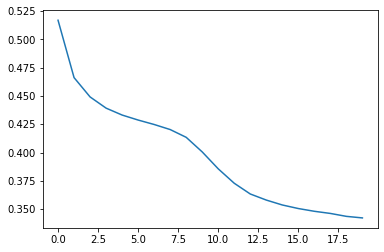

In [29]:
plt.plot(history.history['loss'])

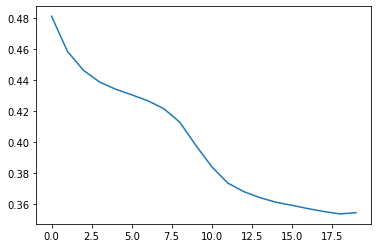

In [30]:
plt.plot(history.history['val_loss'])

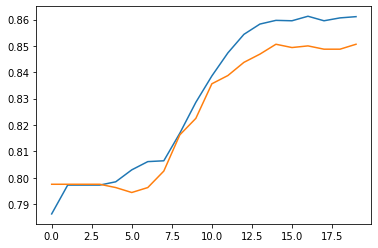

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])